### Computational Finance | Take-home Project

*Ferdinando Giordano*, <br>*Tommaso Malenchini*, <br>*Alessandro Ivashkevich*. <br><br>
***

**Overview**: This work intends to replicate some of the most crucial statistics taken from the well-known publication “Buffett’s Alpha” authored by Frazzini, Kabiller and Pedersen . This paper, deconstructs Warren Buffett’s successful investing principles, pointing to several factors that helped him achieve extraordinary results. Due to the academic nature of the Computational Finance course, our project intends to implement and study these factors in practice in order to complement our knowledge. <br>

**Buffett's Performance**: Warren Buffett’s company, Berkshire Hathaway, has been unusually successful. From 1976 to 2011, that success manifested in the average annual excess return of 19.0%, compared to the market’s 6.1% . Although this high returns rate is associated with cheap leverage and High Sharpe ratio, as shown by a Sharpe ratio of 0.76, Buffett managed it well. Leverage, about 1.6-to-1, is one of the strategy foundations that magnify the returns. The other strategy opportunity is taking advantage of low-risk, high-quality, and undervalued stocks 'Whether we are talking about socks or stocks, I like buying quality merchandise when it is marked down', _Warren Buffet, 2008_. In Buffett's Alpha, FKP proposes two additional factos called Betting-Against-Beta and Quality-Minus-Junk, respectively. Such approach contributes to the enhancement of the competitive edge over the more traditional approaches constituents. <br>

**Project Objectives**:In line with concepts including the Sharpe Ratio, the Capital Asset Pricing Model , and the Fama and French three-factor model , our project emulates the methodologies that contributed to Buffett’s success. Since optimal technique has to ensure data continuity, our risk factors data will be collected from the AQR website, and price data, including Berkshire’s historical price data, will be collected from Yahoo Finance. Regarding our analysis, we will compute the monthly Sharpe Ratio and Information Ratios of Berkshire compared to the U.S. Market and use the same factors as in the FKP study as the target ratios.


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
import yfinance as yf

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


 _TASK 1,2,3:_ Importing the risk factors from the AQR website, the market price data on Berk- shire’s Hathaway, Buffett’s company, and, lastly, we compute and report summary statistics on factors returns, as well as Berkshire’s returns.

In [3]:
# Reading the risk factors 
pd.read_excel('/Users/f3rd1/Desktop/warrensan/BABmonthly.xlsx')
sheets = ["Factors"]
df = pd.read_excel('/Users/f3rd1/Desktop/warrensan/BABmonthly.xlsx', sheet_name=sheets, index_col= 'DATE', parse_dates=True)

data = df['Factors']
print(data)

                 BAB       MKT       SMB    HML FF       UMD       QMJ  \
DATE                                                                     
1999-12-31 -0.113037  0.078741  0.032537 -0.045065  0.106092 -0.013583   
2000-01-31 -0.002048 -0.042145  0.050176 -0.000573  0.012701 -0.027291   
2000-02-29 -0.134174  0.027377  0.127406 -0.084274  0.170105 -0.066672   
2000-03-31  0.001288  0.053077 -0.097396  0.013317 -0.049388  0.045559   
2000-04-30  0.068801 -0.064876 -0.056284  0.061486 -0.080470  0.064407   
...              ...       ...       ...       ...       ...       ...   
2023-10-31  0.036233 -0.033260 -0.044019 -0.002735  0.031529  0.041054   
2023-11-30 -0.007065  0.089874  0.000731  0.000372  0.023050 -0.033023   
2023-12-31 -0.021419  0.049976  0.063652  0.028080 -0.055175 -0.054798   
2024-01-31  0.013770  0.003917 -0.045427 -0.011706  0.050521  0.013098   
2024-02-29 -0.013660  0.049590 -0.000266 -0.035068  0.041707 -0.037333   

            RISK-FREE  
DATE         

In [4]:
# from yahoo finance import the market price data on Berkshire’s Hathaway starting from 31/12/1999 at the end of the month
import datetime
symbol = ['BRK-B']
stocks_df = yf.download(symbol,
                        start='1999-11-01',
                        end='2024-04-01',
                        progress=False,
                        interval='1mo')['Adj Close']

stock_dataframe = pd.DataFrame(stocks_df)
print(stock_dataframe)

             Adj Close
Date                  
1999-11-01   37.299999
1999-12-01   36.599998
2000-01-01   32.919998
2000-02-01   28.799999
2000-03-01   36.400002
...                ...
2023-11-01  360.000000
2023-12-01  356.660004
2024-01-01  383.739990
2024-02-01  409.399994
2024-03-01  420.519989

[293 rows x 1 columns]


In [5]:
# transforming month_end_stocks_df into a dataframe
stocks_df.index = pd.to_datetime(stocks_df.index)
month_end_stocks_df = stocks_df.resample('M').last()
month_end_stocks_df = pd.DataFrame(month_end_stocks_df)
print(month_end_stocks_df)

             Adj Close
Date                  
1999-11-30   37.299999
1999-12-31   36.599998
2000-01-31   32.919998
2000-02-29   28.799999
2000-03-31   36.400002
...                ...
2023-11-30  360.000000
2023-12-31  356.660004
2024-01-31  383.739990
2024-02-29  409.399994
2024-03-31  420.519989

[293 rows x 1 columns]


In [6]:
# compute the monthly returns of Berkshire’s Hathaway
monthly_returns = month_end_stocks_df.pct_change()
monthly_returns = monthly_returns.dropna()
print(monthly_returns)

            Adj Close
Date                 
1999-12-31  -0.018767
2000-01-31  -0.100546
2000-02-29  -0.125152
2000-03-31   0.263889
2000-04-30   0.052747
...               ...
2023-11-30   0.054698
2023-12-31  -0.009278
2024-01-31   0.075927
2024-02-29   0.066868
2024-03-31   0.027162

[292 rows x 1 columns]


In [7]:
# substraction of the risk free rate from the monthly returns of Berkshire’s Hathaway
monthly_returns['RISK-FREE'] = data['RISK-FREE']
monthly_returns['Excess Return'] = monthly_returns['Adj Close'] - monthly_returns['RISK-FREE']
monthly_returns = monthly_returns.dropna()
print(monthly_returns)


            Adj Close  RISK-FREE  Excess Return
Date                                           
1999-12-31  -0.018767   0.004292      -0.023058
2000-01-31  -0.100546   0.004308      -0.104855
2000-02-29  -0.125152   0.004608      -0.129760
2000-03-31   0.263889   0.004683       0.259206
2000-04-30   0.052747   0.004767       0.047981
...               ...        ...            ...
2023-10-31  -0.025607   0.004433      -0.030040
2023-11-30   0.054698   0.004442       0.050256
2023-12-31  -0.009278   0.004375      -0.013653
2024-01-31   0.075927   0.004333       0.071593
2024-02-29   0.066868   0.004350       0.062518

[291 rows x 3 columns]


In [8]:
monthly_excess_returns = monthly_returns['Excess Return']
monthly_excess_returns = pd.DataFrame(monthly_excess_returns)
print(monthly_excess_returns)

            Excess Return
Date                     
1999-12-31      -0.023058
2000-01-31      -0.104855
2000-02-29      -0.129760
2000-03-31       0.259206
2000-04-30       0.047981
...                   ...
2023-10-31      -0.030040
2023-11-30       0.050256
2023-12-31      -0.013653
2024-01-31       0.071593
2024-02-29       0.062518

[291 rows x 1 columns]


In [9]:
# merging the monthly excess returns with the risk factors 
new_data = pd.merge(data, monthly_excess_returns, left_index=True, right_index=True)
print(new_data)

                 BAB       MKT       SMB    HML FF       UMD       QMJ  \
DATE                                                                     
1999-12-31 -0.113037  0.078741  0.032537 -0.045065  0.106092 -0.013583   
2000-01-31 -0.002048 -0.042145  0.050176 -0.000573  0.012701 -0.027291   
2000-02-29 -0.134174  0.027377  0.127406 -0.084274  0.170105 -0.066672   
2000-03-31  0.001288  0.053077 -0.097396  0.013317 -0.049388  0.045559   
2000-04-30  0.068801 -0.064876 -0.056284  0.061486 -0.080470  0.064407   
...              ...       ...       ...       ...       ...       ...   
2023-10-31  0.036233 -0.033260 -0.044019 -0.002735  0.031529  0.041054   
2023-11-30 -0.007065  0.089874  0.000731  0.000372  0.023050 -0.033023   
2023-12-31 -0.021419  0.049976  0.063652  0.028080 -0.055175 -0.054798   
2024-01-31  0.013770  0.003917 -0.045427 -0.011706  0.050521  0.013098   
2024-02-29 -0.013660  0.049590 -0.000266 -0.035068  0.041707 -0.037333   

            RISK-FREE  Excess Return 

In [10]:
# changing the name of the column adj close to BRK-B
new_data = new_data.rename(columns={'Excess Return': 'BRK-B'})
print(new_data)

                 BAB       MKT       SMB    HML FF       UMD       QMJ  \
DATE                                                                     
1999-12-31 -0.113037  0.078741  0.032537 -0.045065  0.106092 -0.013583   
2000-01-31 -0.002048 -0.042145  0.050176 -0.000573  0.012701 -0.027291   
2000-02-29 -0.134174  0.027377  0.127406 -0.084274  0.170105 -0.066672   
2000-03-31  0.001288  0.053077 -0.097396  0.013317 -0.049388  0.045559   
2000-04-30  0.068801 -0.064876 -0.056284  0.061486 -0.080470  0.064407   
...              ...       ...       ...       ...       ...       ...   
2023-10-31  0.036233 -0.033260 -0.044019 -0.002735  0.031529  0.041054   
2023-11-30 -0.007065  0.089874  0.000731  0.000372  0.023050 -0.033023   
2023-12-31 -0.021419  0.049976  0.063652  0.028080 -0.055175 -0.054798   
2024-01-31  0.013770  0.003917 -0.045427 -0.011706  0.050521  0.013098   
2024-02-29 -0.013660  0.049590 -0.000266 -0.035068  0.041707 -0.037333   

            RISK-FREE     BRK-B  
DAT

In [11]:
# reporting summary statistics on new_data
print(new_data.describe())

              BAB         MKT         SMB      HML FF         UMD         QMJ  \
count  291.000000  291.000000  291.000000  291.000000  291.000000  291.000000   
mean     0.007013    0.005727    0.001338    0.001057    0.003054    0.004389   
std      0.039519    0.047047    0.027451    0.031709    0.052145    0.029748   
min     -0.156751   -0.185315   -0.097396   -0.128673   -0.346154   -0.088969   
25%     -0.007833   -0.021953   -0.015939   -0.015714   -0.015126   -0.011294   
50%      0.006909    0.010769    0.000290    0.000045    0.007274    0.003550   
75%      0.022115    0.034443    0.017747    0.015236    0.028659    0.022083   
max      0.153617    0.133911    0.127406    0.128325    0.170105    0.120837   

        RISK-FREE       BRK-B  
count  291.000000  291.000000  
mean     0.001423    0.008164  
std      0.001558    0.051791  
min     -0.000008   -0.142388  
25%      0.000083   -0.021654  
50%      0.000875    0.005255  
75%      0.002321    0.035632  
max      0.005

In [12]:
# skewness and kurtosis of the data
skewness = new_data.skew()
kurtosis = new_data.kurtosis()

print("Skewness and Kurtosis of each column:")
print("{:<15} {:<15} {:<15}".format('Column', 'Skewness', 'Kurtosis'))
for col in new_data.columns:
    print("{:<15} {:<15.2f} {:<15.2f}".format(col, skewness[col], kurtosis[col]))


Skewness and Kurtosis of each column:
Column          Skewness        Kurtosis       
BAB             -0.24           3.48           
MKT             -0.52           0.94           
SMB             0.38            1.77           
HML FF          0.24            2.50           
UMD             -1.63           9.15           
QMJ             0.04            1.28           
RISK-FREE       0.92            -0.52          
BRK-B           0.30            1.92           


_Statistical considerations:_  
- The minimum values show that all the factors, including RISK-FREE, have experienced negative returns at some point. This highlights the importance of understanding downside risks when investing in these assets. <br> <br>
- The skewness illustrates that the distribution of BAB and MKT lean towards lower values, while UMD significantly does so, suggesting more frequent lower outliers. Conversely, SMB, HML FF, QMJ, RISK-FREE, and BRK-B are either slightly right-skewed or nearly symmetric, indicating a tendency toward higher values. In terms of kurtosis, except for UMD which shows a very high likelihood of extreme values, most factors including BAB indicate fewer or normal extremes.

/Users/f3rd1/opt/anaconda3/envs/finance_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/f3rd1/opt/anaconda3/envs/finance_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/f3rd1/opt/anaconda3/envs/finance_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/f3rd1/opt/anaconda3/envs/finance_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

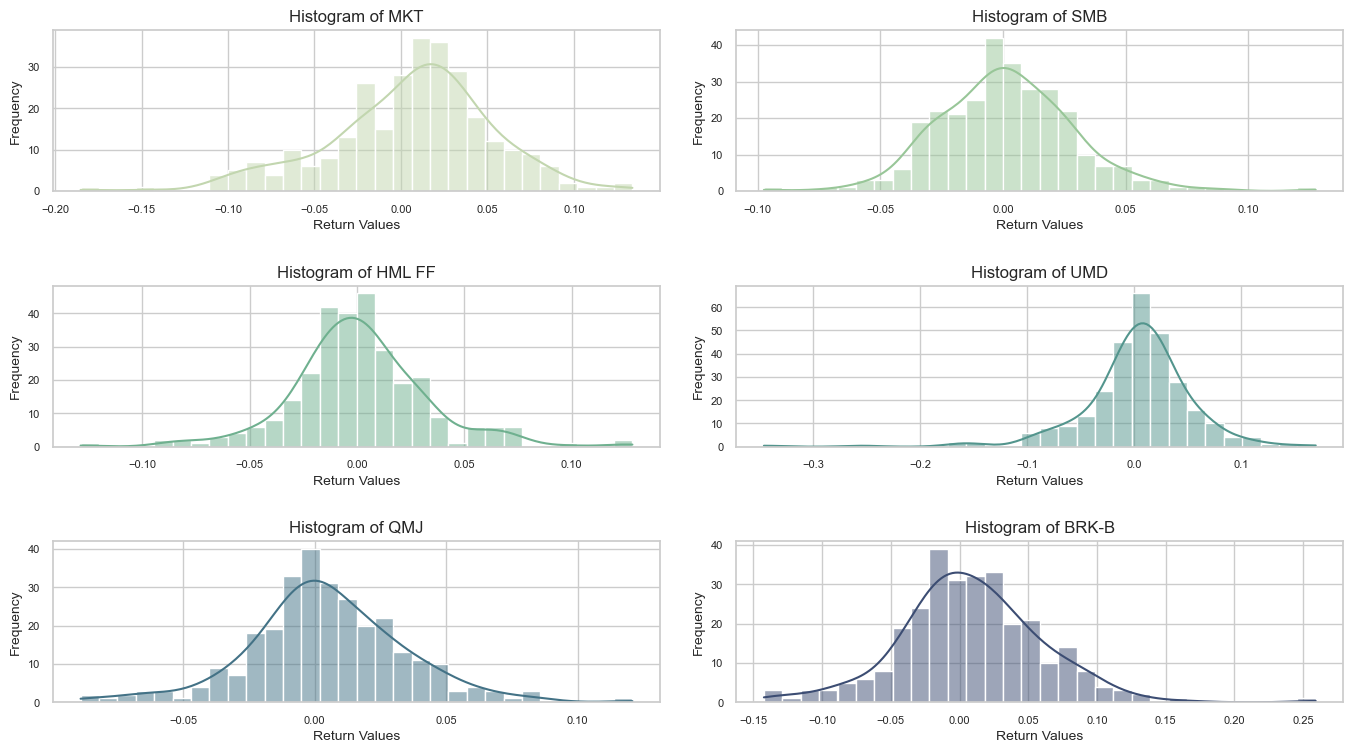

In [13]:
# visualizing the returns using seaborn
sns.set(style="whitegrid")
data_columns = ['MKT', 'SMB', 'HML FF', 'UMD', 'QMJ', 'BRK-B']

# plotting Histograms
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 8))
axes = axes.flatten() 
palette = sns.cubehelix_palette(len(data_columns), start=.5, rot=-.75, dark=0.3, light=.8)

for i, col in enumerate(data_columns):

    sns.histplot(data=new_data, x=col, bins=30, kde=True, color=palette[i], ax=axes[i])
    axes[i].set_title(f'Histogram of {col}', fontsize=12) 
    axes[i].set_xlabel('Return Values', fontsize=10) 
    axes[i].set_ylabel('Frequency', fontsize=10)  
    axes[i].tick_params(axis='both', which='major', labelsize=8) 

plt.tight_layout(pad=2.0)
plt.show()


_Considerations:_ <br>
Only UMD returns seem to follow a normal distrbution. (_notice that normality assumption should be proven by further analysis_) 

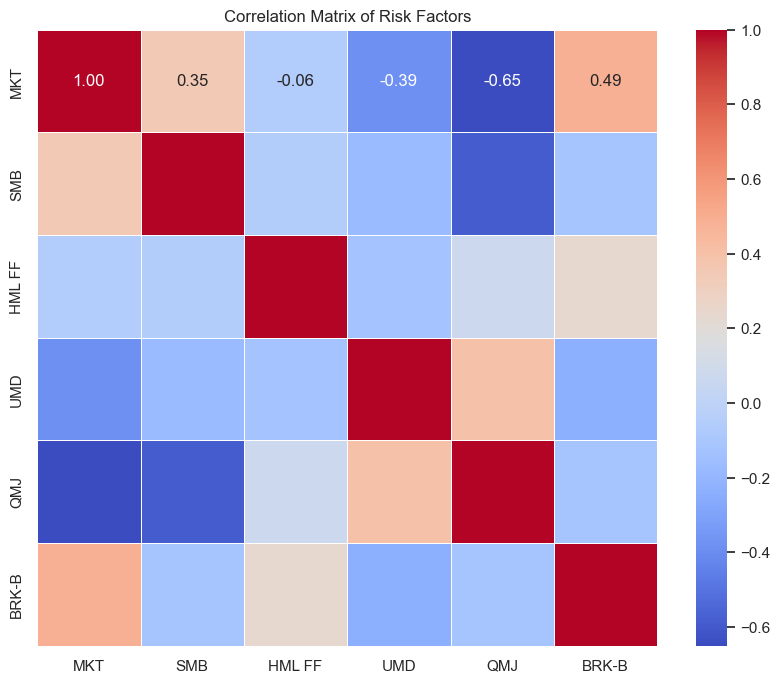

In [25]:
# Calculating the correlation matrix
correlation_matrix = new_data[data_columns].corr()

# plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Risk Factors')
plt.show()

_TASK 4:_ Computing the monthly (annualized) Sharpe ratio and Information ratio for Berkshire. 

In [37]:
# monthly annualized Sharpe Ratio of Berkshire’s Hathaway
monthly_sharpe_ratio = new_data['BRK-B'].mean() / new_data['BRK-B'].std()
annualized_sharpe_ratio = monthly_sharpe_ratio * np.sqrt(12)
print('The annualized Sharpe Ratio of Berkshire’s Hathaway is:', annualized_sharpe_ratio)

The annualized Sharpe Ratio of Berkshire’s Hathaway is: 0.5460213048652763


In [38]:
# monthly annualized Sharpe Ratio of the US Market
risk_free_rate = new_data['RISK-FREE'].mean() 
monthly_excess_returns_mkt = new_data['MKT'] - risk_free_rate

# recalculating the Sharpe ratio using excess returns
monthly_sharpe_ratio_mkt = monthly_excess_returns_mkt.mean() / monthly_excess_returns_mkt.std()
annualized_sharpe_ratio_mkt = monthly_sharpe_ratio_mkt * np.sqrt(12)
print('The annualized Excess Sharpe Ratio of the US Market is:', annualized_sharpe_ratio_mkt)

The annualized Excess Sharpe Ratio of the US Market is: 0.3169421390568168


In [39]:
# calculate excess returns
new_data['Excess_Returns'] = new_data['BRK-B'] - new_data['MKT']

# mean and standard deviation of excess returns (needed for Information Ratio)
mean_excess = new_data['Excess_Returns'].mean()
std_excess = new_data['Excess_Returns'].std()

# information ratio
information_ratio = mean_excess / std_excess

# annualized information ratio (assuming monthly data, multiply by sqrt(12))
annualized_information_ratio = information_ratio * np.sqrt(12)

print("Information Ratio:", information_ratio)
print("Annualized Information Ratio:", annualized_information_ratio)

Information Ratio: 0.048513833464992294
Annualized Information Ratio: 0.16805684886260386


_Considerations_: <br>
- The Information Ratio (IR) is a measure used to evaluate the performance of an investment relative to its benchmark, essentially comparing the excess return of an investment to the volatility of those returns relative to its benchmark ( we decide to took MKT as our benchmark).
It's a particularly useful measure for understanding how well a portfolio manager is performing against a given market index or benchmark, taking into account the consistency and risk-adjusted return.<br>   

- Within the US Market with a Sharpe ratio of 0.317 and that of Berkshire Hathaway with a Sharpe ratio of 0.546, the Sharpe ratio expresses the superior risk-adjusted performance of Berkshire. The Sharpe ratio analysis shows that Warren Buffet’s investing principles of long-term value investing fair better than the rest of the market and are synonymous with excess returns . The outlier implications challenge the Efficient Market Hypothesis due to the fact that the Sharpe ratio implies a higher return on investment per unit of risk . Therefore, a high Sharpe ratio may appeal to investors looking for an efficient fund and an investment that aligns with their investment goals.

_TASK 5:_ Estimating the multivariate regression inspired to _FKP_. 

We have that: $R_t^e = \alpha + \beta_1 Mkt_t + \beta_2 SMB_t + \beta_3 HML_t + \beta_4 UMD_t + \beta_5 BAB_t + \beta_6 QMJ_t + \varepsilon_t$ <br>

where: <br><br> $\alpha$ represents the part of the return that cannot be attributed to the market variation <br> <br> $MKT_t$ indicates the CAPM market factor <br> <br> $SMB_t$, $HML_t$ are the Fama-French Three-Factor Model factors <br> <br> $UMD_t$ is the momentum factor <br> <br> $BAB_t$ (_Betting Against Beta_): this factor involves buying low-beta stocks and shorting high-beta stocks, though it tends to underperform during financial crises due to its inherent risks. <br> <br> $QMJ_t$ (_Quality Minus Junk_): this strategy operates long high-quality stocks and short low-quality stocks <br><br>$\beta$ represent the asset's sensitivity to market movements, furtherly, it will constitute the potfolio weights





In [18]:
# dependent variable
y = new_data['BRK-B']

# independent variables, adding a constant term for the intercept
X = new_data[['MKT', 'SMB', 'HML FF', 'UMD', 'BAB', 'QMJ']]
X = sm.add_constant(X)  # constant term to the predictor

# Fit the regression model
model = sm.OLS(y, X).fit()
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                  BRK-B   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     33.62
Date:                Fri, 03 May 2024   Prob (F-statistic):           1.44e-30
Time:                        13:41:12   Log-Likelihood:                 527.19
No. Observations:                 291   AIC:                            -1040.
Df Residuals:                     284   BIC:                            -1015.
Df Model:                           6                                         
Covariance Type:            nonrobust  

In [16]:
# also, we regress the excess returns of Berkshire’s Hathaway on the Fama-French factors to see changes in the coefficients
y = new_data['BRK-B']

# independent variables, adding a constant term for the intercept
X = new_data[['MKT', 'SMB', 'HML FF',]]
X = sm.add_constant(X)  # constant term to the predictor

# Fit the regression model
fama_french_model = sm.OLS(y, X).fit()
print(fama_french_model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                  BRK-B   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     63.21
Date:                Fri, 03 May 2024   Prob (F-statistic):           2.09e-31
Time:                        12:08:20   Log-Likelihood:                 522.91
No. Observations:                 291   AIC:                            -1038.
Df Residuals:                     287   BIC:                            -1023.
Df Model:                           3                                         
Covariance Type:            nonrobust  

In [24]:
# comparing results 
info_dict = {
    'R-squared': lambda x: f"{x.rsquared:.4f}",  
    'Adjusted R-squared': lambda x: f"{x.rsquared_adj:.4f}",
    'No. observations': lambda x: f"{int(x.nobs):d}"}

model_names = [
    'FKP Factors Model (w/ QMJ & BAB)          ',  # Added spaces after the name
    '          Fama French Three-Factor Model'  # Added spaces before the name
]

results_table = summary_col(results=[model, fama_french_model],
                            float_format='%0.4f',
                            stars=True,
                            model_names=model_names,
                            info_dict=info_dict,
                            regressor_order=['const', 'MKT', 'SMB', 'HML FF', 'BAB', 'QMJ'])

results_table.add_title('Comparison of Regression Models - BRK-B Stock Analysis')

print(results_table.as_text())

                        Comparison of Regression Models - BRK-B Stock Analysis
                   FKP Factors Model (w/ QMJ & BAB)                     Fama French Three-Factor Model
------------------------------------------------------------------------------------------------------
const              0.0025                                     0.0047*                                 
                   (0.0025)                                   (0.0024)                                
MKT                0.7563***                                  0.6761***                               
                   (0.0671)                                   (0.0539)                                
SMB                -0.4561***                                 -0.6014***                              
                   (0.1063)                                   (0.0923)                                
HML FF             0.3776***                                  0.4194***                          

_Considerations:_  <br> 
- The constant (alpha) is significantly lower when we account for the full model <br> 
- The inclusion of the QMJ factor shows a significant positive coefficient (0.3237**), indicating that high-quality, less "junky" stocks contribute positively to the returns. <br>
-  An higher R-squared suggests that FKP Factors Models capture additional systematic variations in stock returns. 

_TASK 6:_ Constructing the Buffett-style replica: <br>  

We try to  construct a systematic replica of Warren Buffett’s investment strategy using the approach described in Frazzini, Kabiller, and Pedersen's "Buffett's Alpha" paper. Initially, we estimate the passive market exposure of Berkshire Hathaway through a simple regression against the market:<br> $R_{BRK-B} = \alpha + \beta_{\text{MKT}} \cdot MKT_t + \epsilon_t$ , Here $\beta_{\text{MKT}}$  is estimated as the sensitivity of Berkshire Hathaway's returns to the market. <br> 



In [28]:
# beta of Berkshire Hathaway 
y = new_data['BRK-B']
X = sm.add_constant(new_data['MKT'])  

# Fit the regression model
market_model = sm.OLS(y, X).fit()
new_data['Beta_Market'] = market_model.params['MKT']  
print(market_model.summary())

beta_buffett=market_model.params['MKT']
print('The beta of Berkshire Hathaway is:', beta_buffett)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                  BRK-B   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     89.90
Date:                Fri, 03 May 2024   Prob (F-statistic):           9.59e-19
Time:                        15:08:36   Log-Likelihood:                 488.51
No. Observations:                 291   AIC:                            -973.0
Df Residuals:                     289   BIC:                            -965.7
Df Model:                           1                                         
Covariance Type:            nonrobust  

_6.1:_ Multivariate regression for stock selection: <br> <br>
$R_{BRK-B}^e = \alpha + \beta_{\text{MKT}} \cdot MKT_t + \beta_{\text{SMB}} \cdot SMB_t + \beta_{\text{HML}} \cdot HML_{FF,t} + \beta_{\text{UMD}} \cdot UMD_t + \beta_{\text{BAB}} \cdot BAB_t + \beta_{\text{QMJ}} \cdot QMJ_t + \epsilon_t$  _This formula involves fitting Berkshire's adjusted returns to FKP factors to isolate the returns due to active stock selection._


In [26]:
# Define the independent variables for the multivariate regression
factors = ['MKT', 'SMB', 'HML FF', 'UMD', 'BAB', 'QMJ']
X_factors = sm.add_constant(new_data[factors])

# Fit the multivariate model
factor_model = sm.OLS(y, X_factors).fit()

# Get the adjusted active returns based on the residuals of this model
new_data['Active_Returns'] = factor_model

print(factor_model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                  BRK-B   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     33.62
Date:                Fri, 03 May 2024   Prob (F-statistic):           1.44e-30
Time:                        14:51:49   Log-Likelihood:                 527.19
No. Observations:                 291   AIC:                            -1040.
Df Residuals:                     284   BIC:                            -1015.
Df Model:                           6                                         
Covariance Type:            nonrobust  

_6.2:_ Scaling Active Returns for Idiosyncratic Volatility:
<br> <br>$ R_{\text{Active, adjusted}} = R_{\text{Active}} \cdot \frac{\sigma_I}{\sigma(R_{\text{Active}})} $
   where: <br> 
- $ \sigma_I $ is the idiosyncratic volatility from the market model, <br> 
- $ \sigma(R_{\text{Active}})$ represents the standard deviation of the active returns.


In [29]:
new_data['Adjusted_Returns'] = new_data['BRK-B'] - beta_buffett * new_data['MKT']

vol_idiosyncratic= new_data['Adjusted_Returns'].std()
print('The idiosyncratic volatility of Berkshire Hathaway is:', vol_idiosyncratic)


The idiosyncratic volatility of Berkshire Hathaway is: 0.04523190320548381


In [30]:
# add constant in the model
X = sm.add_constant(new_data[['MKT', 'SMB', 'HML FF', 'UMD', 'BAB', 'QMJ']])

# Fit the model
active_model = sm.OLS(new_data['Adjusted_Returns'], X).fit()
print(active_model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:       Adjusted_Returns   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     14.42
Date:                Fri, 03 May 2024   Prob (F-statistic):           2.36e-14
Time:                        15:08:47   Log-Likelihood:                 527.19
No. Observations:                 291   AIC:                            -1040.
Df Residuals:                     284   BIC:                            -1015.
Df Model:                           6                                         
Covariance Type:            nonrobust  

In [31]:
# returns from Buffet’s active stock selection
coefficients = active_model.params
print(coefficients)



const     0.002532
MKT       0.220028
SMB      -0.456086
HML FF    0.377614
UMD      -0.077312
BAB       0.046609
QMJ       0.323716
dtype: float64


In [40]:
# active return for each time period
new_data['Active_Stock_Selection'] = (coefficients['MKT'] * new_data['MKT'] +
                                      coefficients['SMB'] * new_data['SMB'] +
                                      coefficients['HML FF'] * new_data['HML FF'] +
                                      coefficients['UMD'] * new_data['UMD'] +
                                      coefficients['BAB'] * new_data['BAB'] +
                                      coefficients['QMJ'] * new_data['QMJ'])

In [41]:
new_data['Buffet_Active_Return'] = (coefficients['MKT'] * new_data['MKT'] +
                                    coefficients['SMB'] * new_data['SMB'] +
                                    coefficients['HML FF'] * new_data['HML FF'] +
                                    coefficients['UMD'] * new_data['UMD'] +
                                    coefficients['BAB'] * new_data['BAB'] +
                                    coefficients['QMJ'] * new_data['QMJ'])

In [42]:
#  active volatility
vol_active = new_data['Buffet_Active_Return'].std()

data['Adjusted Buffett Active Return'] = new_data['Buffet_Active_Return'] * (vol_idiosyncratic / vol_active)

# rescale active returns to match the idiosyncratic volatility
new_data['Active_Returns_Adjusted'] = new_data['Buffet_Active_Return'] * (vol_idiosyncratic / vol_active)

# adjusted active return
adjusted_active_return = new_data['Active_Returns_Adjusted'].std()
print('The adjusted volatility from Buffet’s active stock selection is:', adjusted_active_return)

The adjusted volatility from Buffet’s active stock selection is: 0.0452319032054838


_6.3:_ Buffett-Style Systematic Returns Incorporation:<br> <br>
 Here, This final equation combines the risk-free rate, market exposure, and the scaled active returns to simulate a Buffett-style investment return: <br>
$ R_{\text{Buffett-style}} = R_f + \beta_{\text{Buffett}} \cdot MKT_t + R_{\text{Active, adjusted}} $

In [43]:
# Buffett-style returns
new_data['Buffett_Style_Returns'] = new_data['RISK-FREE'] + beta_buffett * new_data['MKT'] + new_data['Active_Returns_Adjusted']
print(new_data[['RISK-FREE', 'Beta_Market', 'MKT', 'Active_Returns_Adjusted', 'Buffett_Style_Returns']])

            RISK-FREE  Beta_Market       MKT  Active_Returns_Adjusted  \
DATE                                                                    
1999-12-31   0.004292     0.536227  0.078741                -0.067056   
2000-01-31   0.004308     0.536227 -0.042145                -0.087517   
2000-02-29   0.004608     0.536227  0.027377                -0.258492   
2000-03-31   0.004683     0.536227  0.053077                 0.165066   
2000-04-30   0.004767     0.536227 -0.064876                 0.134304   
...               ...          ...       ...                      ...   
2023-10-31   0.004433     0.536227 -0.033260                 0.050224   
2023-11-30   0.004442     0.536227  0.089874                 0.014034   
2023-12-31   0.004375     0.536227  0.049976                -0.045331   
2024-01-31   0.004333     0.536227  0.003917                 0.037536   
2024-02-29   0.004350     0.536227  0.049590                -0.037577   

            Buffett_Style_Returns  
DATE          

_Considerations:_ The output data delivers the momentum behind a Buffett-style investment strategy simulated across years, characterized by the monthly returns of varying gaps. Most importantly, the impact of the active management element as described in Buffett’s Alpha by Frazzini, Kabiller, and Pedersen is the main influencing factor. This is notable from the periods where the active returns adjusted have contributed to either the loss buffering or gain boosting from the market-neutral perspective. It is traditionally accomplished by relying on the low-volatility, high-quality stock that forms the backbone of Buffett’s legacy. For example, in March 2000, despite the close market returns, market gains were moderately augmented with the adjusted active returns that significantly colored a better total return, hence affirming the impact of stock selection based on factors to the overall performance.

_TASK 7:_ It involves plotting the cumulative returns from a $100 initial investment in a Buffett-style fund against Berkshire Hathaway and the overall stock market, as modeled in "Buffett's Alpha" by Frazzini, Kabiller, and Pedersen. This graph should replicate the analysis shown _below_, highlighting the performance of our systematic Buffett-style strategy over time, comparing its growth to that of Berkshire and the adjusted market. <br> <br> <br> <br>
<img src="/Users/f3rd1/Desktop/warrensan/plot.png" alt="description of image" width="800" height="500">









In [51]:
#converting returns to growth factors
new_data['Berkshire_Growth'] = (1 + new_data['BRK-B'])
new_data['Buffett_Style_Growth'] = (1 + new_data['Buffett_Style_Returns'])

In [52]:
# setting the portfolio initial investment
initial_investment = 100

# calculate cumulative return
#new_data['Cumulative_Berkshire'] = new_data['Berkshire_Growth'].cumprod() * initial_investment
#new_data['Cumulative_Buffett_Style'] = new_data['Buffett_Style_Growth'].cumprod() * initial_investment
new_data['LogReturns_Berkshire'] = np.log(new_data['Berkshire_Growth'])
new_data['LogReturns_Buffett_Style'] = np.log(new_data['Buffett_Style_Growth'])

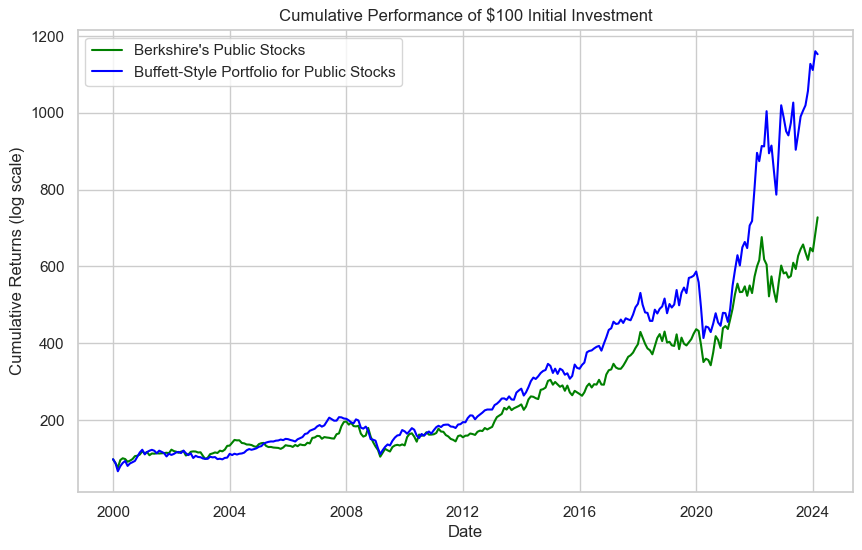

In [53]:
# visualizing the cumulative performance of a $100 initial investment in Berkshire’s Hathaway and Buffett-Style Portfolio
plt.figure(figsize=(10, 6))
plt.plot(new_data.index, new_data['Cumulative_Berkshire'], label='Berkshire\'s Public Stocks', color='green')
plt.plot(new_data.index, new_data['Cumulative_Buffett_Style'], label='Buffett-Style Portfolio for Public Stocks', color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns (log scale)')
plt.title('Cumulative Performance of $100 Initial Investment')
plt.legend()
plt.grid(True)
plt.show()

_Considerations:_<br>  The plot that an initial $100 investment in our portfolio would have reached $1200, which is much higher than the value of Berkshire’s public stocks. According to calculations provided in Buffett’s Alpha , written by Frazzini, Kabiller, and Pedersen, it is possible to explain such a significant outperformance due to look-ahead bias in our model. Although our strategy demonstrates a substantial return, which is in line with Buffett’s investment style, the previously mentioned bias may overstate its predictive power compared to realized success.

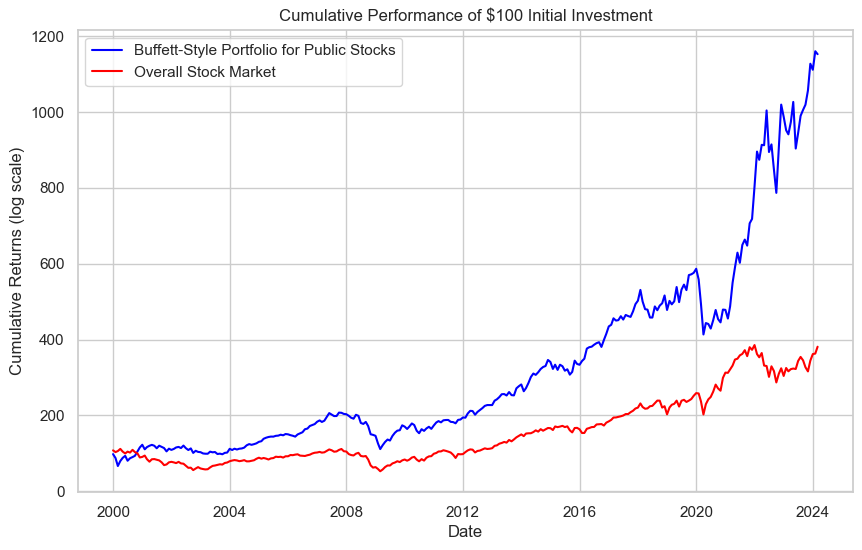

In [57]:
# visualizing the cumulative performance of a $100 initial investment in Buffett style porfolio and the overall stock market
initial_investment = 100
new_data['Cumulative_Stock_Market'] = (1 + new_data['MKT']).cumprod() * initial_investment 
plt.figure(figsize=(10, 6))
plt.plot(new_data.index, new_data['Cumulative_Buffett_Style'], label='Buffett-Style Portfolio for Public Stocks', color='blue')
plt.plot(new_data.index, new_data['Cumulative_Stock_Market'], label='Overall Stock Market', color='red')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns (log scale)')
plt.title('Cumulative Performance of $100 Initial Investment')
plt.grid(True)
plt.legend()
plt.show()

_Connsiderations:_ <br>  the plot presents a difference in the value of $100 initial investment between the Buffett-style portfolio and overall stock market. The Buffett-style portfolio outperforms, and as seen in the table and annexe table, the difference becomes significant from 2012 onwards. This is consistent with the results of Frazzini, Kabiller, and Pedersens , that the performance difference is due to strategic factor exposure and leverage adjustment. The systematic implementation of Buffett’s principles does indeed lead to enhanced performance compared to the traditional market operation.

_TASK 8:_  Running regressions of Berkshire on the systematic portfolio and of the systematic portfolio on Berkshire

_8.1:_ Regressing Berkshire on the Systematic Portfolio

In [58]:
# regression of Berkshire on the systematic portfolio
X = sm.add_constant(new_data['Buffett_Style_Returns'])  # Independent variable
y = new_data['BRK-B']  # Dependent variable
model_berkshire_on_systematic = sm.OLS(y, X).fit()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


_8.2:_ Regressing systematic portfolio on Berkshire 

In [59]:
# regression of the systematic portfolio on Berkshire
X = sm.add_constant(new_data['BRK-B'])  # Independent variable
y = new_data['Buffett_Style_Returns']  # Dependent variable
# Fit the model
model_systematic_on_berkshire = sm.OLS(y, X).fit()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


_8.3:_ Comparing the results 

In [63]:
# reporting models results 
model_names = [
    'Berkshire on Portfolio     ',
    'Portfolio on Berkshire'
]

pd.set_option('display.max_colwidth', None)  

results_table = summary_col(results=[model_berkshire_on_systematic, model_systematic_on_berkshire],
                            float_format='%0.4f',
                            stars=True,
                            model_names=model_names,
                            info_dict=info_dict,
                            regressor_order=['const'])

results_table.add_title('Comparison of Regression Models - Dependency Analysis')
print(results_table.as_text())

         Comparison of Regression Models - Dependency Analysis
                      Berkshire on Portfolio      Portfolio on Berkshire
------------------------------------------------------------------------
const                 0.0022                      0.0048**              
                      (0.0025)                    (0.0024)              
BRK-B                                             0.6063***             
                                                  (0.0468)              
Buffett_Style_Returns 0.6067***                                         
                      (0.0468)                                          
R-squared             0.3678                      0.3678                
R-squared Adj.        0.3656                      0.3656                
R-squared             0.3678                      0.3678                
Adjusted R-squared    0.3656                      0.3656                
No. observations      291                         291        

_Findings:_ <br> 
The beta coefficients for Berkshire Hathaway returns and the Buffett-style systematic portfolio do indeed have “a strong beta” that is “statistically highly significant” apparent by the number of around 0.606 . It means that the degree of their dependence, or the strength of the relationship between the normal and systematic portfolios and Buffett’s alpha, is great and similar . The similarity in R-squared values across both regressions (approximately 36.78%) suggests that each portfolio can explain a significant portion of the other's variance. This mutual influence underscores the effectiveness of replicating Buffett’s strategies within a systematic framework, providing insights into how closely the constructed Buffett-style portfolio mirrors the actual movements and strategic decisions in Berkshire’s investments.